In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Credit_Card_Transaction_Dataset.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Missing Values

In [3]:
# Checking the number of Missing values in each column in the dataframe
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Therefore there are no missing values in the data.

0    284315
1       492
Name: Class, dtype: int64

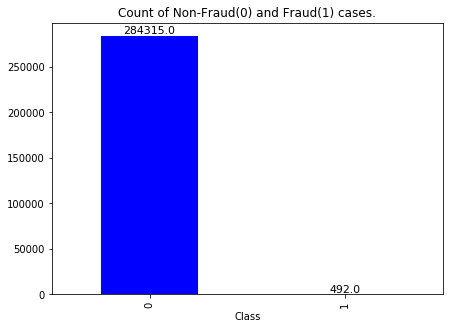

In [4]:
ax = data.groupby('Class')['Class'].count().plot(kind='bar', figsize=(7, 5), color=['b', 'r'])
plt.title('Count of Non-Fraud(0) and Fraud(1) cases.')

def add_value_labels(ax, spacing=0):
    """Add labels to the end of each bar in a bar chart.
    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width()/2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,                      # Vertically align label differently for positive and negative values.
            fontsize = 11)              # Font size of the label

# Call the function above. All the magic happens there.
add_value_labels(ax)

# Print Value counts
data['Class'].value_counts()

Data is highly imbalanced. We have only 492 Fraudulent data to train the model.

# Data Scaling

Since 2 columns 'Time' and 'Amount' are at a higher range, we scale them.

In [5]:
data1 = data.copy()

In [6]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
scaled_amount = robust_scaler.fit_transform(data1['Amount'].values.reshape(-1, 1))
scaled_time = robust_scaler.fit_transform(data1['Time'].values.reshape(-1, 1))

data1.insert(0, 'scaled_amount', scaled_amount)
data1.insert(1, 'scaled_time', scaled_time)
data1.drop(['Time', 'Amount'], axis=1, inplace=True)

In [7]:
data1.shape

(284807, 31)

<h6>Randomly selecting 92 rows of fraudulent and non-fraudulent transactions to test the final accuracy of the model.</h6>

In [8]:
from random import sample

# Selecting 92 fraudulent rows into test_data
test_data = data1[data1['Class'] == 1].sample(n=92, replace=False, random_state=45, axis=0)
# Selecting and concatenating 92 non-fraudulent rows to test_data
test_data = pd.concat([test_data, data1[data1['Class'] == 0].sample(n=92, replace=False, random_state=45, axis=0)])

data1.drop(test_data.index, axis=0, inplace=True) # Removing the selected test_data from data1 using index
data1.reset_index(drop=True, inplace=True) # Reseting index of data1
test_data.reset_index(drop=True, inplace=True) # Resetting index of test_data

# Data Resampling and Correlating

In [9]:
from sklearn.utils import resample

data_majority = data1[data1['Class'] == 0]
data_minority = data1[data1['Class'] == 1]

## Random Under Sampling

In [10]:
data_majority_downsampled = resample(data_majority, 
                                    replace = False,
                                    n_samples = data_minority.shape[0],
                                    random_state = 45)

In [11]:
data_downsampled = pd.concat([data_majority_downsampled, data_minority], axis=0)
data_downsampled

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
16929,-0.067351,-0.662343,-0.519592,0.887041,1.440904,1.330286,0.284853,-0.012403,0.549903,0.117502,...,0.186150,-0.019202,0.260108,-0.106747,0.096713,-0.081636,-0.223810,0.421882,0.207647,0
7725,-0.170474,-0.868560,1.199158,-0.168107,0.757965,0.340283,-0.823447,-0.530779,-0.439505,-0.034332,...,-0.172695,-0.207774,-0.188265,-0.028095,0.553367,0.333497,1.045624,-0.103216,-0.015765,0
167140,-0.093202,0.398148,-1.125312,1.335067,1.059821,-0.536617,0.448135,-0.410490,0.865537,-0.860655,...,-0.088990,0.570791,-0.669633,-0.286658,0.054203,0.748385,-0.313583,0.175647,0.117995,0
176373,1.683784,0.447632,1.781078,-1.691981,-0.832571,-1.113080,-0.614168,1.292150,-1.344471,0.502827,...,0.104802,0.554312,1.371882,0.027887,-1.618788,-0.450534,0.035961,0.028973,-0.051563,0
43486,0.310487,-0.506949,1.017597,-0.614946,1.091626,-0.017019,-0.865996,0.801200,-0.923912,0.475695,...,-0.065265,0.007679,0.153640,0.080567,-0.217846,-0.089671,1.029553,-0.013452,0.004884,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276683,4.570391,0.970947,-1.374424,2.793185,-4.346572,2.400731,-1.688433,0.111136,-0.922038,-2.149930,...,0.650196,-0.870779,0.504849,0.137994,0.368275,0.103137,-0.414209,0.454982,0.096711,1
279682,5.142178,0.992140,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1
279962,-0.296793,0.994549,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,1
279968,0.780968,0.994596,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,1


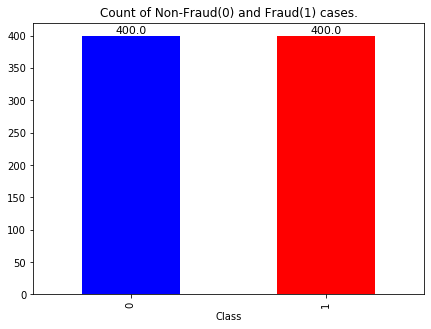

In [12]:
ax = data_downsampled.groupby('Class')['Class'].count().plot(kind='bar', figsize=(7, 5), color=['b', 'r'])
plt.title('Count of Non-Fraud(0) and Fraud(1) cases.')
add_value_labels(ax)

## Random Over Sampling

In [13]:
data_minority_upsampled = resample(data_minority,
                                  replace = True,
                                  n_samples = data_majority.shape[0],
                                  random_state = 45)

In [14]:
data_upsampled = pd.concat([data_minority_upsampled, data_majority], axis=0)
data_upsampled

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
57428,-0.296793,-0.431972,0.364377,1.443523,-2.220907,2.036985,-1.237055,-1.728161,-2.058582,0.358895,...,0.310980,0.402730,-0.132129,-0.032977,0.460861,0.560404,0.409366,0.539668,0.296918,1
252607,-0.296653,0.837334,-1.201398,4.864535,-8.328823,7.652399,-0.167445,-2.767695,-3.176421,1.623279,...,0.597026,0.532320,-0.556913,0.192444,-0.698588,0.025003,0.514968,0.378105,-0.053133,1
9481,-0.293440,-0.829650,-4.153014,8.204797,-15.031714,10.330100,-3.994426,-3.250013,-10.415698,4.620804,...,1.412625,1.976988,0.256510,0.485908,-1.198821,-0.526567,0.634874,1.627209,0.723235,1
42577,0.857682,-0.511308,-6.498086,4.750515,-8.966558,7.098854,-6.958376,-2.822126,-10.333406,4.031907,...,0.568338,2.158143,0.111510,0.216414,0.584661,0.760360,0.081972,1.415068,0.035124,1
128390,0.530986,-0.070102,-4.312479,1.886476,-2.338634,-0.475243,-1.185444,-2.112079,-2.122793,0.272565,...,-0.718706,0.550541,-0.067870,-1.114692,0.269069,-0.020572,-0.963489,-0.918888,0.001454,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284618,-0.296653,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284619,0.038986,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284620,0.641096,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284621,-0.167680,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


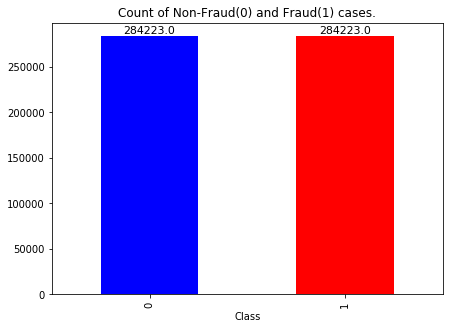

In [15]:
ax = data_upsampled.groupby('Class')['Class'].count().plot(kind='bar', figsize=(7, 5), color=['b', 'r'])
plt.title('Count of Non-Fraud(0) and Fraud(1) cases.')
add_value_labels(ax)

### Correlation Matrix

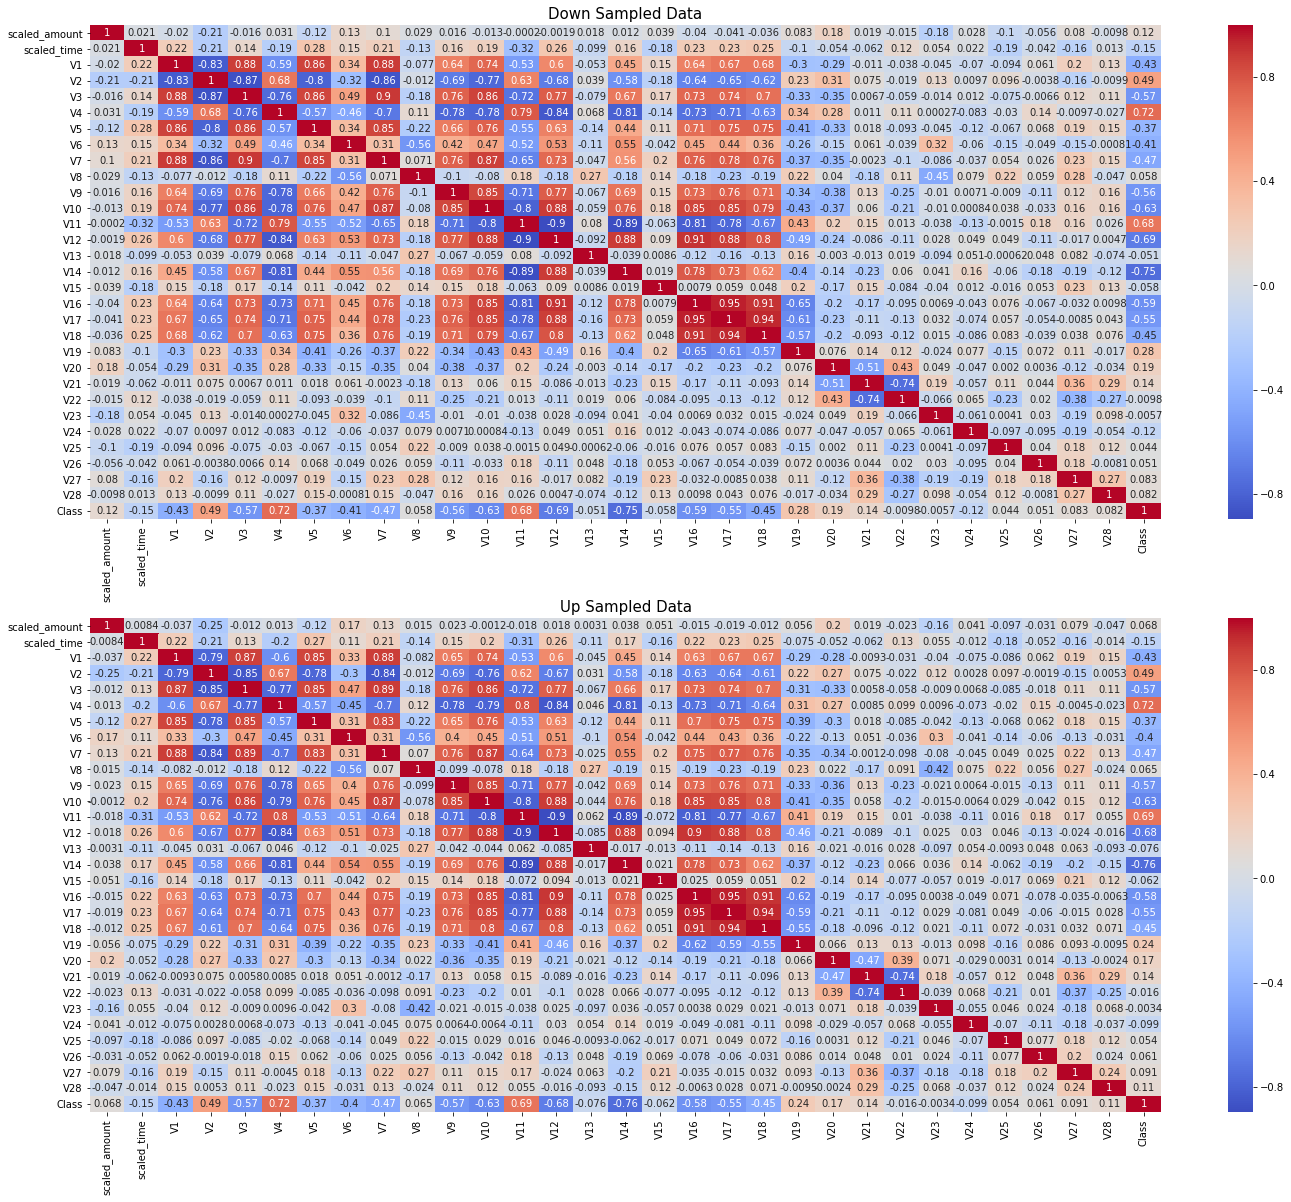

In [16]:
downsampled_CM = pd.DataFrame(data_downsampled.corr())
upsampled_CM = pd.DataFrame(data_upsampled.corr())

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

sns.heatmap(downsampled_CM, cmap='coolwarm', annot=True, ax=ax1)
ax1.set_title('Down Sampled Data', fontsize=15)

sns.heatmap(upsampled_CM, cmap='coolwarm', annot=True, ax=ax2)
ax2.set_title('Up Sampled Data', fontsize=15)

plt.show()

#### Since both the correlation matrices are similar, we can proceed furthur with upsampled data, So that we can train our model with maximum data.

# Outlier Analysis

'V4','V11','V12','V14' are highly correlated with the target variable 'Class'.<br>

Next, We will remove extreme outliers from our features that have high correlation with our classes. This will have positive impact on the accuracy of our models.

In [17]:
data2 = data_upsampled.copy()

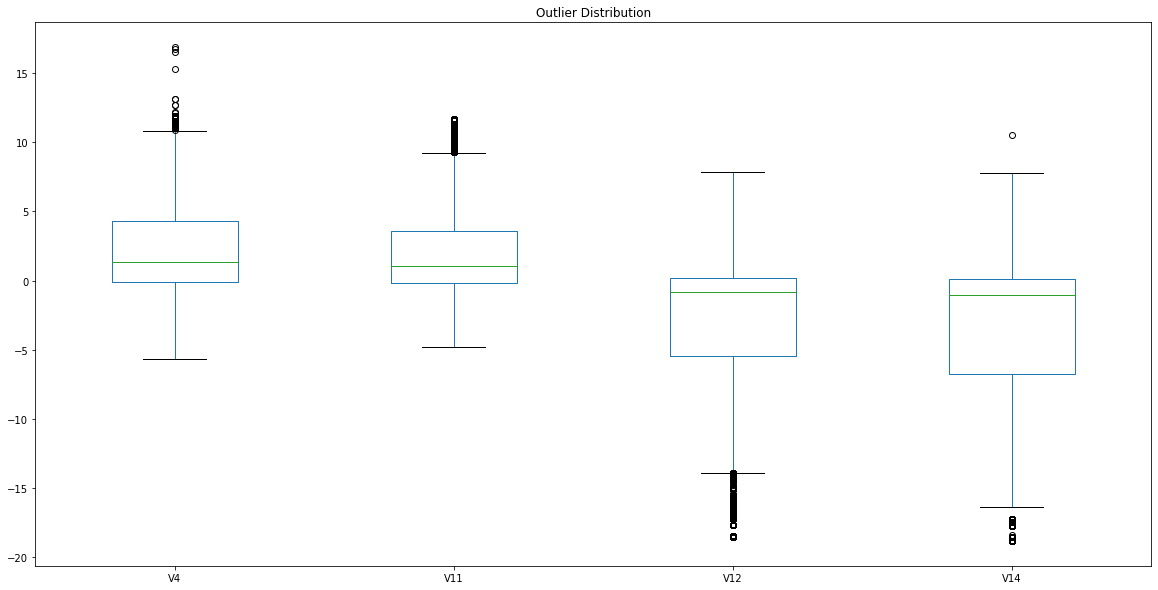

In [18]:
data2[['V4','V11','V12','V14']].plot.box(figsize=(20, 10), legend=True, title='Outlier Distribution')

In [19]:
# Function to remove outliers
def removeOutliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    iqr = Q3 - Q1
    
    filter = (df[col] >= (Q1 - 1.5 * iqr)) & (df[col] <= (Q3 + 1.5 * iqr))
    noOfOutliers = df.shape[0] - df.loc[filter].shape[0]
    return noOfOutliers, df.loc[filter]

In [20]:
cols = ['V4','V11','V12','V14']
total = 0
for col in cols:
    print('Column:', col.upper(), ' --> ', end=' ')
    n, data2 = removeOutliers(data2, col)
    total += n
    print('Number of Outliers:', n)
print('Number of rows reduced from ', data_upsampled.shape[0], ' to ', data2.shape[0])
print('Total outliers removed: ', total)

Column: V4  -->  Number of Outliers: 7793
Column: V11  -->  Number of Outliers: 6534
Column: V12  -->  Number of Outliers: 23996
Column: V14  -->  Number of Outliers: 2
Number of rows reduced from  568446  to  530121
Total outliers removed:  38325


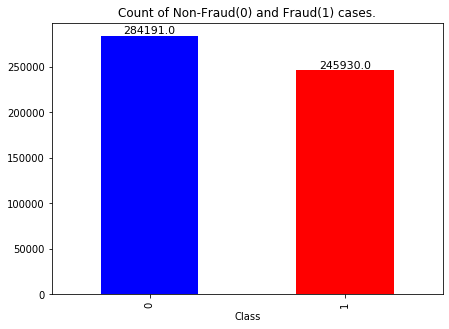

In [21]:
ax = data2.groupby('Class')['Class'].count().plot(kind='bar', figsize=(7, 5), color=['b', 'r'])
plt.title('Count of Non-Fraud(0) and Fraud(1) cases.')
add_value_labels(ax)

# Model Development

In [22]:
data2.reset_index(drop=True, inplace=True)
data3 = data2.copy()

In [23]:
# # Undersampling before cross validating (prone to overfit)
# X = data3.drop('Class', axis=1)
# Y = data3['Class']

In [24]:
# # Our data is already scaled we should split our training and test sets
# from sklearn.model_selection import train_test_split

# # This is explicitly used for undersampling.
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
X_train = data3.drop('Class', axis=1)
Y_train = data3['Class']
X_test = test_data.drop('Class', axis=1)
Y_test = test_data['Class']

In [26]:
print('Train:\n',Y_train.value_counts())
print('Test:\n', Y_test.value_counts())

Train:
 0    284191
1    245930
Name: Class, dtype: int64
Test:
 1    92
0    92
Name: Class, dtype: int64


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import pickle

Train Accuracy:  94.63367797163289
Test Accuracy:  95.1086956521739

---------------------------------------------------------------------------------

CLASSIFICATION REPORT for Test Data: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95        92
           1       0.99      0.91      0.95        92

    accuracy                           0.95       184
   macro avg       0.95      0.95      0.95       184
weighted avg       0.95      0.95      0.95       184


---------------------------------------------------------------------------------


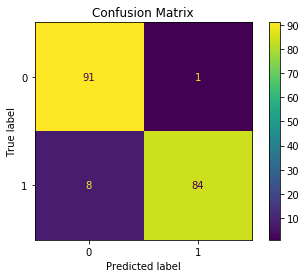

PRECISION =  0.9891304347826086
RECALL =  0.9191919191919192

---------------------------------------------------------------------------------

PRECISION RECALL CURVE


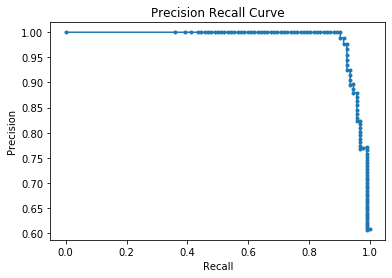

Area Under Precision Recall Curve(AUPRC):  0.9851608173712703

---------------------------------------------------------------------------------


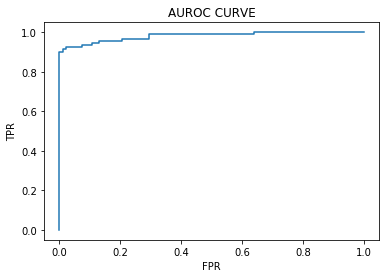

In [28]:
# LR = LogisticRegression()
# LR.fit(X_train, Y_train)
# lr_pred = LR.predict(X_test)

# # Since data is huge, it take lot of time to train the model. Hence we save it and load it back when we re-run. 
# pickle.dump(LR, open('LinearRegressionModel.sav', 'wb'))   
# pd.DataFrame(lr_pred).to_csv('LR_prediction.csv', index=False)

LR = pickle.load(open('LinearRegressionModel.sav', 'rb')) # Loading the saved model
lr_pred = pd.read_csv('LR_prediction.csv') # Loading the predicted labels of Linear Regression

print('Train Accuracy: ', LR.score(X_train, Y_train)*100)
print('Test Accuracy: ', LR.score(X_test, Y_test)*100)
print('\n---------------------------------------------------------------------------------')
print('\nCLASSIFICATION REPORT for Test Data: \n', classification_report(Y_test, lr_pred))
print('\n---------------------------------------------------------------------------------')
disp = plot_confusion_matrix(LR, X_test, Y_test, display_labels=[0, 1])
disp.ax_.set_title('Confusion Matrix')
plt.show()
lr_tp, lr_fp, lr_fn, lr_tn = confusion_matrix(Y_test, lr_pred, labels=[0, 1]).ravel()
lr_Precision = lr_tp/(lr_tp+lr_fp)
lr_Recall = lr_tp/(lr_tp+lr_fn)
print('PRECISION = ', lr_Precision)
print('RECALL = ', lr_Recall)
print('\n---------------------------------------------------------------------------------')
print('\nPRECISION RECALL CURVE')
lr_probs = LR.predict_proba(X_test)
lr_probs = lr_probs[:, 1] # keep probabilities for the positive outcome only
lr_precision, lr_recall, lr_thresholds = precision_recall_curve(Y_test, lr_probs)
lr_auc = auc(lr_recall, lr_precision)
plt.plot(lr_recall, lr_precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()
print('Area Under Precision Recall Curve(AUPRC): ', lr_auc)
print('\n---------------------------------------------------------------------------------')
lr_fpr, lr_tpr, lr_thresold = roc_curve(Y_test, lr_probs)
plt.plot(lr_fpr, lr_tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUROC CURVE') #AUROC -> Area under Receiver Operating Characteristic Curve
plt.show()

Train Accuracy:  99.98302274386414
Test Accuracy:  90.76086956521739

---------------------------------------------------------------------------------

CLASSIFICATION REPORT for Test Data: 
               precision    recall  f1-score   support

           0       0.84      1.00      0.92        92
           1       1.00      0.82      0.90        92

    accuracy                           0.91       184
   macro avg       0.92      0.91      0.91       184
weighted avg       0.92      0.91      0.91       184


---------------------------------------------------------------------------------


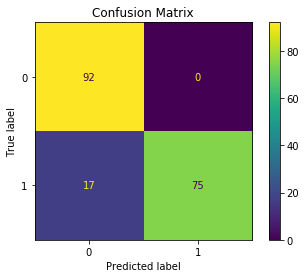

PRECISION =  1.0
RECALL =  0.8440366972477065

---------------------------------------------------------------------------------

PRECISION RECALL CURVE


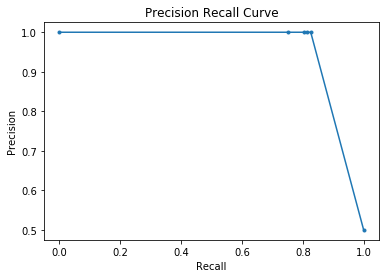

Area Under Precision Recall Curve(AUPRC):  0.9565217391304348

---------------------------------------------------------------------------------


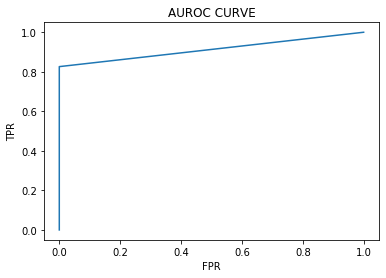

In [29]:
# KNN = KNeighborsClassifier()
# KNN.fit(X_train, Y_train)
# knn_pred = KNN.predict(X_test)

# # Since data is huge, it take lot of time to train the model. Hence we save it and load it back when we re-run. 
# pickle.dump(KNN, open('KNN_Model.sav', 'wb'))
# pd.DataFrame(knn_pred).to_csv('KNN_prediction.csv', index=False)

KNN = pickle.load(open('KNN_Model.sav', 'rb')) # Loading the saved model
knn_pred = pd.read_csv('KNN_prediction.csv') # Loading the predicted labels of KNN

print('Train Accuracy: ', KNN.score(X_train, Y_train)*100)
print('Test Accuracy: ', KNN.score(X_test, Y_test)*100)
print('\n---------------------------------------------------------------------------------')
print('\nCLASSIFICATION REPORT for Test Data: \n', classification_report(Y_test, knn_pred))
print('\n---------------------------------------------------------------------------------')
disp = plot_confusion_matrix(KNN, X_test, Y_test, display_labels=[0, 1])
disp.ax_.set_title('Confusion Matrix')
plt.show()
knn_tp, knn_fp, knn_fn, knn_tn = confusion_matrix(Y_test, knn_pred, labels=[0, 1]).ravel()
knn_Precision = knn_tp/(knn_tp+knn_fp)
knn_Recall = knn_tp/(knn_tp+knn_fn)
print('PRECISION = ', knn_Precision)
print('RECALL = ', knn_Recall)
print('\n---------------------------------------------------------------------------------')
print('\nPRECISION RECALL CURVE')
knn_probs = KNN.predict_proba(X_test)
knn_probs = knn_probs[:, 1] # keep probabilities for the positive outcome only
knn_precision, knn_recall, knn_thresholds = precision_recall_curve(Y_test, knn_probs)
knn_auc = auc(knn_recall, knn_precision)
plt.plot(knn_recall, knn_precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()
print('Area Under Precision Recall Curve(AUPRC): ', knn_auc)
print('\n---------------------------------------------------------------------------------')
knn_fpr, knn_tpr, knn_thresold = roc_curve(Y_test, knn_probs)
plt.plot(knn_fpr, knn_tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUROC CURVE') #AUROC -> Area under Receiver Operating Characteristic Curve
plt.show()

Train Accuracy:  100.0
Test Accuracy:  82.06521739130434

---------------------------------------------------------------------------------

CLASSIFICATION REPORT for Test Data: 
               precision    recall  f1-score   support

           0       0.74      1.00      0.85        92
           1       1.00      0.64      0.78        92

    accuracy                           0.82       184
   macro avg       0.87      0.82      0.81       184
weighted avg       0.87      0.82      0.81       184


---------------------------------------------------------------------------------


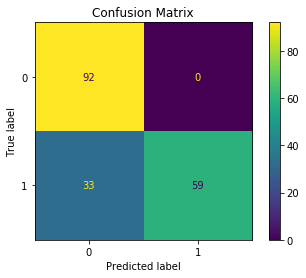

PRECISION =  1.0
RECALL =  0.736

---------------------------------------------------------------------------------

PRECISION RECALL CURVE


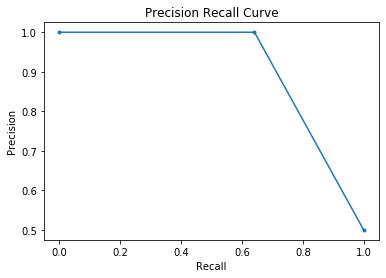

Area Under Precision Recall Curve(AUPRC):  0.9103260869565217

---------------------------------------------------------------------------------


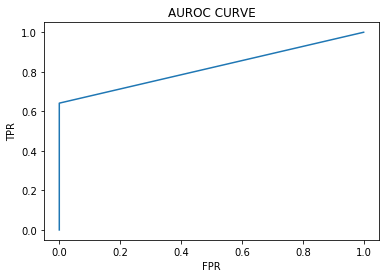

In [30]:
# DTC = DecisionTreeClassifier()
# DTC.fit(X_train, Y_train)
# dtc_pred = DTC.predict(X_test)

# # Since data is huge, it take lot of time to train the model. Hence we save it and load it back when we re-run.
# pickle.dump(DTC, open('DecisionTreeClassifier.sav', 'wb'))
# pd.DataFrame(dtc_pred).to_csv('DTC_prediction.csv', index=False)

DTC = pickle.load(open('DecisionTreeClassifier.sav', 'rb'))
dtc_pred = pd.read_csv('DTC_prediction.csv')

print('Train Accuracy: ', DTC.score(X_train, Y_train)*100)
print('Test Accuracy: ', DTC.score(X_test, Y_test)*100)
print('\n---------------------------------------------------------------------------------')
print('\nCLASSIFICATION REPORT for Test Data: \n', classification_report(Y_test, dtc_pred))
print('\n---------------------------------------------------------------------------------')
disp = plot_confusion_matrix(DTC, X_test, Y_test, display_labels=[0, 1])
disp.ax_.set_title('Confusion Matrix')
plt.show()
dtc_tp, dtc_fp, dtc_fn, dtc_tn = confusion_matrix(Y_test, dtc_pred, labels=[0, 1]).ravel()
dtc_Precision = dtc_tp/(dtc_tp+dtc_fp)
dtc_Recall = dtc_tp/(dtc_tp+dtc_fn)
print('PRECISION = ', dtc_Precision)
print('RECALL = ', dtc_Recall)
print('\n---------------------------------------------------------------------------------')
print('\nPRECISION RECALL CURVE')
dtc_probs = DTC.predict_proba(X_test)
dtc_probs = dtc_probs[:, 1] # keep probabilities for the positive outcome only
dtc_precision, dtc_recall, dtc_thresholds = precision_recall_curve(Y_test, dtc_probs)
dtc_auc = auc(dtc_recall, dtc_precision)
plt.plot(dtc_recall, dtc_precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()
print('Area Under Precision Recall Curve(AUPRC): ', dtc_auc)
print('\n---------------------------------------------------------------------------------')
dtc_fpr, dtc_tpr, dtc_thresold = roc_curve(Y_test, dtc_probs)
plt.plot(dtc_fpr, dtc_tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUROC CURVE') #AUROC -> Area under Receiver Operating Characteristic Curve
plt.show()

Train Accuracy:  100.0
Test Accuracy:  84.78260869565217

---------------------------------------------------------------------------------

CLASSIFICATION REPORT for Test Data: 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        92
           1       1.00      0.70      0.82        92

    accuracy                           0.85       184
   macro avg       0.88      0.85      0.84       184
weighted avg       0.88      0.85      0.84       184


---------------------------------------------------------------------------------


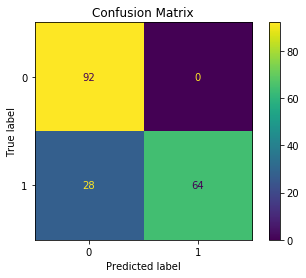

PRECISION =  1.0
RECALL =  0.7666666666666667

---------------------------------------------------------------------------------

PRECISION RECALL CURVE


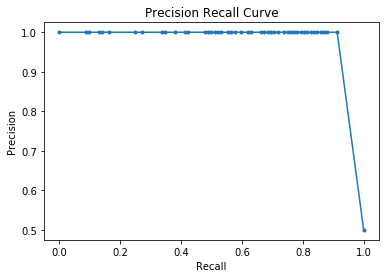

Area Under Precision Recall Curve(AUPRC):  0.9782608695652173

---------------------------------------------------------------------------------


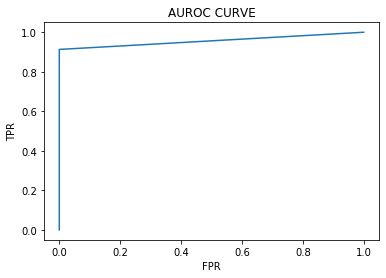

In [31]:
# RFC = RandomForestClassifier()
# RFC.fit(X_train, Y_train)
# rfc_pred = RFC.predict(X_test)

# # Since data is huge, it take lot of time to train the model. Hence we save it and load it back when we re-run.
# pickle.dump(RFC, open('RandomForestClassifier.sav', 'wb'))
# pd.DataFrame(rfc_pred).to_csv('RFC_prediction.csv', index=False)

RFC = pickle.load(open('RandomForestClassifier.sav', 'rb'))
rfc_pred = pd.read_csv('RFC_prediction.csv')

print('Train Accuracy: ', RFC.score(X_train, Y_train)*100)
print('Test Accuracy: ', RFC.score(X_test, Y_test)*100)
print('\n---------------------------------------------------------------------------------')
print('\nCLASSIFICATION REPORT for Test Data: \n', classification_report(Y_test, rfc_pred))
print('\n---------------------------------------------------------------------------------')
disp = plot_confusion_matrix(RFC, X_test, Y_test, display_labels=[0, 1])
disp.ax_.set_title('Confusion Matrix')
plt.show()
rfc_tp, rfc_fp, rfc_fn, rfc_tn = confusion_matrix(Y_test, rfc_pred, labels=[0, 1]).ravel()
rfc_Precision = rfc_tp/(rfc_tp+rfc_fp)
rfc_Recall = rfc_tp/(rfc_tp+rfc_fn)
print('PRECISION = ', rfc_Precision)
print('RECALL = ', rfc_Recall)
print('\n---------------------------------------------------------------------------------')
print('\nPRECISION RECALL CURVE')
rfc_probs = RFC.predict_proba(X_test)
rfc_probs = rfc_probs[:, 1] # keep probabilities for the positive outcome only
rfc_precision, rfc_recall, rfc_thresholds = precision_recall_curve(Y_test, rfc_probs)
rfc_auc = auc(rfc_recall, rfc_precision)
plt.plot(rfc_recall, rfc_precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()
print('Area Under Precision Recall Curve(AUPRC): ', rfc_auc)
print('\n---------------------------------------------------------------------------------')
rfc_fpr, rfc_tpr, rfc_thresold = roc_curve(Y_test, rfc_probs)
plt.plot(rfc_fpr, rfc_tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUROC CURVE') #AUROC -> Area under Receiver Operating Characteristic Curve
plt.show()

In [32]:
# svc = SVC(probability=True, kernel='linear')
# svc.fit(X_train, Y_train)
# svc_pred = svc.predict(X_test)

# # Since data is huge, it take lot of time to train the model. Hence we save it and load it back when we re-run.
# pickle.dump(svc, open('SVC_Model.sav', 'wb'))
# pd.DataFrame(svc_pred).to_csv('SVC_prediction.csv', index=False)

# svc = pickle.load(open('SVC_Model.sav', 'rb'))
# svc_pred = pd.read_csv('SVC_prediction.csv')

# print('Train Accuracy: ', svc.score(X_train, Y_train)*100)
# print('Test Accuracy: ', svc.score(X_test, Y_test)*100)
# print('\n---------------------------------------------------------------------------------')
# print('\nCLASSIFICATION REPORT for Test Data: \n', classification_report(Y_test, svc_pred))
# print('\n---------------------------------------------------------------------------------')
# disp = plot_confusion_matrix(svc, X_test, Y_test, display_labels=[0, 1])
# disp.ax_.set_title('Confusion Matrix')
# plt.show()
# svc_tp, svc_fp, svc_fn, svc_tn = confusion_matrix(Y_test, svc_pred, labels=[0, 1]).ravel()
# svc_Precision = svc_tp/(svc_tp+svc_fp)
# svc_Recall = svc_tp/(svc_tp+svc_fn)
# print('PRECISION = ', svc_Precision)
# print('RECALL = ', svc_Recall)
# print('\n---------------------------------------------------------------------------------')
# print('\nPRECISION RECALL CURVE')
# svc_probs = svc.predict_proba(X_test)
# svc_probs = svc_probs[:, 1] # keep probabilities for the positive outcome only
# svc_precision, svc_recall, svc_thresholds = precision_recall_curve(Y_test, svc_probs)
# svc_auc = auc(svc_recall, svc_precision)
# plt.plot(svc_recall, svc_precision, marker='.')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision Recall Curve')
# plt.show()
# print('Area Under Precision Recall Curve(AUPRC): ', svc_auc)
# print('\n---------------------------------------------------------------------------------')
# svc_fpr, svc_tpr, svc_thresold = roc_curve(Y_test, svc_probs)
# plt.plot(svc_fpr, svc_tpr)
# plt.xlabel('FPR')
# plt.ylabel('TPR')
# plt.title('AUROC CURVE') #AUROC -> Area under Receiver Operating Characteristic Curve
# plt.show()

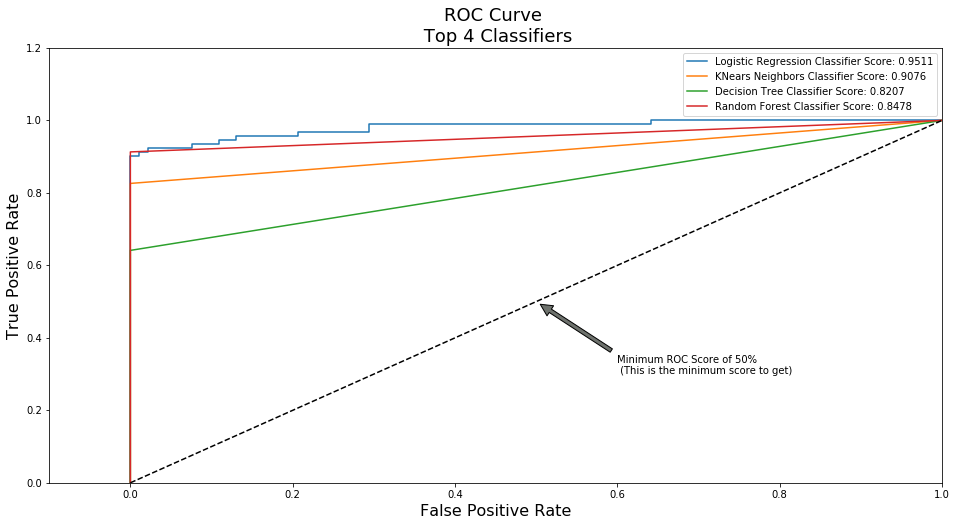

In [33]:
def graph_roc_curve_multiple(lr_fpr, lr_tpr, knn_fpr, knn_tpr, dtc_fpr, dtc_tpr, rfc_fpr, rfc_tpr): #, svc_fpr, svc_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(lr_fpr, lr_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(Y_test, lr_pred)))
    plt.plot(knn_fpr, knn_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(Y_test, knn_pred)))
#    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(Y_test, svc_pred)))
    plt.plot(dtc_fpr, dtc_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(Y_test, dtc_pred)))
    plt.plot(rfc_fpr, rfc_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(Y_test, rfc_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.1, 1, 0, 1.2])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    #plt.xticks(np.arange(min(x), max(x)+1, 2.0))
    plt.legend()
    plt.show()

graph_roc_curve_multiple(lr_fpr, lr_tpr, knn_fpr, knn_tpr, dtc_fpr, dtc_tpr, rfc_fpr, rfc_tpr) #, svc_fpr, svc_tpr)


From the above graph, we can infer that all three(KNN Classifier, Decision Tree Classifier and Random Forest Classifier) Classifiers are giving the same accuracy.

# DONE